# Part I : EDA - Exploratory Data Analysis

## Part 1 Preliminary Stage: Imports

In [2]:
# Imports
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import  MinMaxScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn import set_config
from sklearn.model_selection import train_test_split
import joblib

In [3]:
# Csv
delivery_df = pd.read_csv(r'../data/delivery_2_excel_edits.csv')

## Part 1 Preliminary Stage: Model Description

This project will employ a logistic regression model where the assumptions for this type of model are:

    Source: https://data.compass.lighthouselabs.ca/p/7/days/w05d3/activities/2297

    1. Data should be independent and random (each random variable has the same probability distribution).

    2. The response variable y does not need to be normally distributed, but the distribution is from an exponential family (e.g. binomial, Poisson, multinomial, normal)

    3. The original response variable need not have a linear relationship with the independent variables, but the transformed response variable (through the link function) is linearly dependent on the independent variables



 ## Part 1a: Are there any missing values in the dataset?

In [4]:
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          43739 non-null  float64
 3   Delivery_person_Ratings      45539 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  43862 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         44992 non-null  object 
 13  Vehicle_conditio

In [5]:
delivery_df.head(10)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0.0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,8:30:00,8:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,5/4/2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,(min) 30
5,0x9bb4,HYDRES09DEL03,22.0,4.8,17.431668,78.408321,17.461668,78.438321,11/3/2022,21:20:00,21:30:00,conditions Cloudy,Jam,0,Buffet,motorcycle,1.0,No,Urban,(min) 26
6,0x95b4,RANCHIRES15DEL01,33.0,4.7,23.369746,85.339820,23.479746,85.449820,4/3/2022,19:15:00,19:30:00,conditions Fog,Jam,1,Meal,scooter,1.0,No,Metropolitian,(min) 40
7,0x9eb2,MYSRES15DEL02,35.0,4.6,12.352058,76.606650,12.482058,76.736650,14-03-2022,17:25:00,17:30:00,conditions Cloudy,Medium,2,Meal,motorcycle,1.0,No,Metropolitian,(min) 32
8,0x1102,HYDRES05DEL02,22.0,4.8,17.433809,78.386744,17.563809,78.516744,20-03-2022,20:55:00,21:05:00,conditions Stormy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,(min) 34
9,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12/2/2022,21:55:00,22:10:00,conditions Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,(min) 46


In [6]:
from src.modules.data_preprocessing import keep_number




ModuleNotFoundError: No module named 'src'

In [40]:
# Stage the Cell
delivery_df_cleaning = delivery_df.copy()

# Strip (min) from time taken and convert to Integer
delivery_df_cleaning['Time_taken(min)'] = delivery_df_cleaning['Time_taken(min)'].str.replace('(min) ', '').str.strip()
delivery_df_cleaning['Time_taken(min)'] = delivery_df_cleaning['Time_taken(min)'].astype(int)
delivery_df_cleaning['Time_taken(min)'].value_counts()

Time_taken(min)
26    2123
25    2050
27    1976
28    1965
29    1956
19    1824
15    1810
18    1765
16    1706
17    1696
24    1680
23    1643
20    1640
22    1626
21    1601
33    1259
30    1218
31    1213
34    1172
32    1124
38     887
36     852
39     847
35     832
37     828
11     757
10     750
12     746
14     739
13     716
43     567
42     561
40     555
41     553
44     553
47     295
49     280
48     277
46     274
45     241
53     100
51      94
54      91
52      79
50      72
Name: count, dtype: int64

In [ ]:
# Save the preprocessed dataframe to Joblib
import joblib

joblib.dump(delivery_df_cleaning, "../data/delivery_df_cleaning.csv")


In [41]:
# Stage the Cell
delivery_df2 = delivery_df2.copy()
# Create Ordinal Hierarchy for city

delivery_df2['City'] = delivery_df2['City'].str.strip()
x = {'Metropolitian': '3', 'Semi-Urban': '1', 'Urban': '2', np.nan: '0', '': '0'}
delivery_df2['City'].replace(x, regex=True, inplace=True)
delivery_df2['City'] = delivery_df2['City'].astype('int')
delivery_df2['City'].value_counts()

City
3    34093
2    10136
0     1200
1      164
Name: count, dtype: int64

In [42]:
# Stage Type of vehicle for dummy input
delivery_df2 = delivery_df2.copy()
delivery_df2['Type_of_vehicle'] = delivery_df2['Type_of_vehicle'].str.strip()
x = {'electric_scooter': 'scooter'}
delivery_df2['Type_of_vehicle'].replace(x, regex=True, inplace=True)
delivery_df2 = delivery_df2.rename(columns={'Type_of_vehicle': 'Vehicle'})
delivery_df2['Vehicle'].value_counts()

Vehicle
motorcycle    26435
scooter       19090
bicycle          68
Name: count, dtype: int64

In [43]:
# Get Dummies
delivery_df2 = delivery_df2.copy()
delivery_df2 = pd.concat([delivery_df2, pd.get_dummies(delivery_df2['Vehicle'], prefix='Vehicle')], axis=1)
delivery_df2.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Vehicle', 'multiple_deliveries',
       'Festival', 'City', 'Time_taken(min)', 'Vehicle_bicycle',
       'Vehicle_motorcycle', 'Vehicle_scooter'],
      dtype='object')

In [44]:
# Drop Unused Columns  from moel
delivery_df2 = delivery_df2.copy()
delivery_df2 = delivery_df2.drop(columns=['Vehicle', 'Festival', 'Vehicle_condition'])

In [45]:
delivery_df2 = delivery_df2.copy()

delivery_df2['Weatherconditions'].replace('conditions ', '', inplace=True, regex=True)
delivery_df2['Weatherconditions'] = delivery_df2['Weatherconditions'].str.strip()

# Create Ordinal Hierarchy
x = {'Sandstorms': '6'
    ,'Stormy': '5'
    ,'Fog': '4'
    ,'Windy': '3'
    ,'Cloudy': '2'
    ,'Sunny': '1'
    ,'': '0'}

delivery_df2['Weatherconditions'].replace(x, inplace=True, regex=True)


delivery_df2["Weatherconditions"].value_counts()


Weatherconditions
4    7654
5    7586
2    7536
6    7495
3    7422
1    7284
0     616
Name: count, dtype: int64

In [46]:
# Clean Date and Time Columns

from datetime import datetime, timedelta

def combine_date_time(datecolumn, timecolumn, instance, df):
    df[f'{datecolumn}'] = pd.to_datetime(df[datecolumn], yearfirst=True, format='mixed')
    df[f'{timecolumn}'] = pd.to_datetime(df[timecolumn], format='%H:%M:%S').dt.time

    df[f'Timestamp_{instance}'] = df.apply(lambda row: datetime.combine(row[f'{datecolumn}'], row[f'{timecolumn}']) if pd.notnull(row[f'{datecolumn}']) and pd.notnull(row[f'{timecolumn}']) else pd.NaT, axis=1)

    return df

delivery_df2 = combine_date_time('Order_Date', 'Time_Orderd', 'placed', delivery_df2)
delivery_df2 = combine_date_time('Order_Date', 'Time_Order_picked', 'picked', delivery_df2)


In [47]:
# Define a function to add a day if 'Timestamp_picked' is earlier than 'Timestamp_placed'
def add_day(row):
    if row['Timestamp_picked'] < row['Timestamp_placed']:
        return row['Timestamp_picked'] + pd.DateOffset(days=1)
    else:
        return row['Timestamp_picked']

# Modify column as needed
delivery_df2['Timestamp_picked'] = delivery_df2.apply(add_day, axis=1)

# Drop original Columns
delivery_df2 = delivery_df2.drop(columns=["Order_Date", 'Time_Order_picked', 'Time_Orderd'])

In [48]:
# Create new Column of minutes it takes to pick up once the order is placed
delivery_df2['Time_taken_picked_mins'] = ((delivery_df2['Timestamp_picked'] - delivery_df2['Timestamp_placed']).dt.total_seconds() / 60)
delivery_df2['Time_taken_picked_mins']

0        15.0
1         5.0
2        15.0
3        10.0
4        15.0
         ... 
45588    10.0
45589    15.0
45590    15.0
45591     5.0
45592     5.0
Name: Time_taken_picked_mins, Length: 45593, dtype: float64

In [49]:
# Extract Cities from the delivery ID

delivery_df2_city_abbr = (delivery_df2["Delivery_person_ID"].str.split('RES').str[0]).unique()
delivery_df2_city_abbr

array(['INDO', 'BANG', 'COIMB', 'CHEN', 'HYD', 'RANCHI', 'MYS', 'DEH',
       'KOC', 'PUNE', 'LUDH', 'KNP', 'MUM', 'KOL', 'JAP', 'SUR', 'GOA',
       'AURG', 'AGR', 'VAD', 'ALH', 'BHP'], dtype=object)

In [50]:
# Map Cities in India to Abbreviations
cities = {
    'INDO': 'Indore',
    'BANG': 'Bangalore',
    'COIMB': 'Coimbatore',
    'CHEN': 'Chennai',
    'HYD': 'Hyderabad',
    'RANCHI': 'Ranchi',
    'MYS': 'Mysuru',
    'DEH': 'Delhi',
    'KOC': 'Kochi',
    'PUNE': 'Pune',
    'LUDH': 'Ludhiana',
    'KNP': 'Kanpur',
    'MUM': 'Mumbai',
    'KOL': 'Kolkata',
    'JAP': 'Jaipur',
    'SUR': 'Surat',
    'GOA': 'Goa',
    'AURG': 'Aurangabad',
    'AGR': 'Agra',
    'VAD': 'Vadodara',
    'ALH': 'Allahabad',
    'BHP': 'Bhopal'
}

# Add a new column 'City_name' based on 'Abbreviation'
delivery_df2['City_name'] = (delivery_df2["Delivery_person_ID"].str.split('RES').str[0]).map(cities)
delivery_df2['City_name'] = delivery_df2['City_name'].astype('str') 
delivery_df2['City_name'].unique()

array(['Indore', 'Bangalore', 'Coimbatore', 'Chennai', 'Hyderabad',
       'Ranchi', 'Mysuru', 'Delhi', 'Kochi', 'Pune', 'Ludhiana', 'Kanpur',
       'Mumbai', 'Kolkata', 'Jaipur', 'Surat', 'Goa', 'Aurangabad',
       'Agra', 'Vadodara', 'Allahabad', 'Bhopal'], dtype=object)

In [ ]:
deliver_df2

In [51]:
# columns_coordinates_list = ('Restaurant_latitude', "Restaurant_longitude", 'Delivery_location_latitude', "Delivery_location_longitude")

# def replace_coordinates(columnscoordinates):
#     for columnscoordinates in delivery_df2.columns:

#         delivery_df2[columnscoordinates] = delivery_df2[columnscoordinates].apply(lambda x: x if pd.isna(x) or (isinstance(x, (int, float)) and (x < 0 or x > 1)) else pd.NA)

# delivery_df2[columns_coordinates_list] = delivery_df2[columns_coordinates_list].astype('float')

# replace_coordinates(columns_coordinates_list)

# delivery_df2[columns_coordinates_list]


In [52]:
from math import sin, cos, sqrt, atan2, radians

def distance(lat1, lon1, lat2, lon2):

    if pd.notna(lat1) and pd.notna(lon1) and pd.notna(lat2) and pd.notna(lon2):

        if lat1 < 1 or lon1 < 1 or lat2 < 1 or lon2 < 1 :
            return 

        R = 6373.0  # approximate radius of Earth in km

        lat1 = radians(lat1)
        lon1 = radians(lon1)
        lat2 = radians(lat2)
        lon2 = radians(lon2)

        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

        distance = R * c
        return distance
    else: 
        return 


# Calculate the distance between the two points for each row
delivery_df2['Distance_km'] = delivery_df2.apply(lambda row: distance(row['Restaurant_latitude'], row['Restaurant_longitude'], row['Delivery_location_latitude'], row['Delivery_location_longitude']), axis=1)
delivery_df2['Distance_km'].describe()


count    41522.000000
mean         9.723180
std          5.604786
min          1.465527
25%          4.659117
50%          9.195907
75%         13.685215
max         20.976072
Name: Distance_km, dtype: float64

In [53]:
# from geopy.geocoders import Nominatim

# def reverse_geocode(lat, lon):
    
#     if pd.notna(lat) and pd.notna(lon):

#       if float(lat) < 1 or float(lon) < 1 :
#             return 

#       geolocator = Nominatim(user_agent="delivery_location")
#       location = geolocator.reverse(f"{lat}, {lon}")
#       return location.address
#     else:
#         return

# #test                  
# result = reverse_geocode('22.745049', '75.892471')


# delivery_df2['Restaurant_location'] = delivery_df2.apply(lambda row: reverse_geocode(row['Restaurant_latitude'], row['Restaurant_longitude']), axis=1)
# delivery_df2['Delivery_location'] = delivery_df2.apply(lambda row: reverse_geocode(row['Delivery_location_latitude'], row['Delivery_location_longitude']), axis=1)


In [54]:
df_model = delivery_df2.copy()
delivery_df2.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Weatherconditions',
       'Road_traffic_density', 'Type_of_order', 'multiple_deliveries', 'City',
       'Time_taken(min)', 'Vehicle_bicycle', 'Vehicle_motorcycle',
       'Vehicle_scooter', 'Timestamp_placed', 'Timestamp_picked',
       'Time_taken_picked_mins', 'City_name', 'Distance_km'],
      dtype='object')

In [55]:
delivery_df2 = delivery_df2.copy()

delivery_df2['Road_traffic_density'] = delivery_df2['Road_traffic_density'].str.strip()

# Create Ordinal Hierarchy
x = {'Jam': '3'
    ,'High': '2'
    ,'Medium': '1'
    ,'Low': '0'}

delivery_df2['Road_traffic_density'].replace(x, inplace=True, regex=True)


delivery_df2["Road_traffic_density"].value_counts()

Road_traffic_density
0    15477
3    14143
1    10947
2     4425
Name: count, dtype: int64

In [56]:
df_model = delivery_df2.copy()

df_model = df_model.drop(columns=['ID'
                         ,'Delivery_person_ID'
                         , 'Delivery_person_Age'
                         ,'Delivery_person_Ratings'
                         , 'Restaurant_latitude'
                         ,'Restaurant_longitude'
                         , 'Delivery_location_latitude'
                         ,'Delivery_location_longitude'
                         , 'Type_of_order'
                         ,'Timestamp_placed'
                         , 'Timestamp_picked'
                         ,'Time_taken_picked_mins'
                         , 'City_name']
)
df_model = df_model.dropna()

In [57]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import  MinMaxScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn import set_config
from sklearn.model_selection import train_test_split

In [58]:
X_predictors = df_model.drop(columns=['Time_taken(min)'])
y_outcome = df_model['Time_taken(min)']

In [59]:
# Prepare the data for Modelling
X_train, X_test, y_train, y_test = train_test_split(X_predictors, y_outcome, test_size=0.3, stratify=y_outcome, random_state=42)

In [84]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import metrics

model_estimators = {'Linear Regression': LinearRegression(),
          'Ridge Regression': Ridge(alpha=1.0),
          'Lasso Regression': Lasso(alpha=1.0),
          'ElasticNet Regression': ElasticNet(alpha=1.0, l1_ratio=0.5)}

fitted_models = {}
model_metrics = []
model_y_pred = {}
model_res = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    fitted_models[name] = model
    y_pred = fitted_models[name].predict(X_test)
    
    model_metrics.append({
        'model': name,
        'r2_score': metrics.r2_score(y_test, y_pred), 
        'mean_absolute_error': metrics.mean_absolute_error(y_test, y_pred), 
        "mean_squared_error": metrics.mean_squared_error(y_test, y_pred),
    })
    
    model_y_pred[name] = y_pred
    model_res[name] = y_test - y_pred

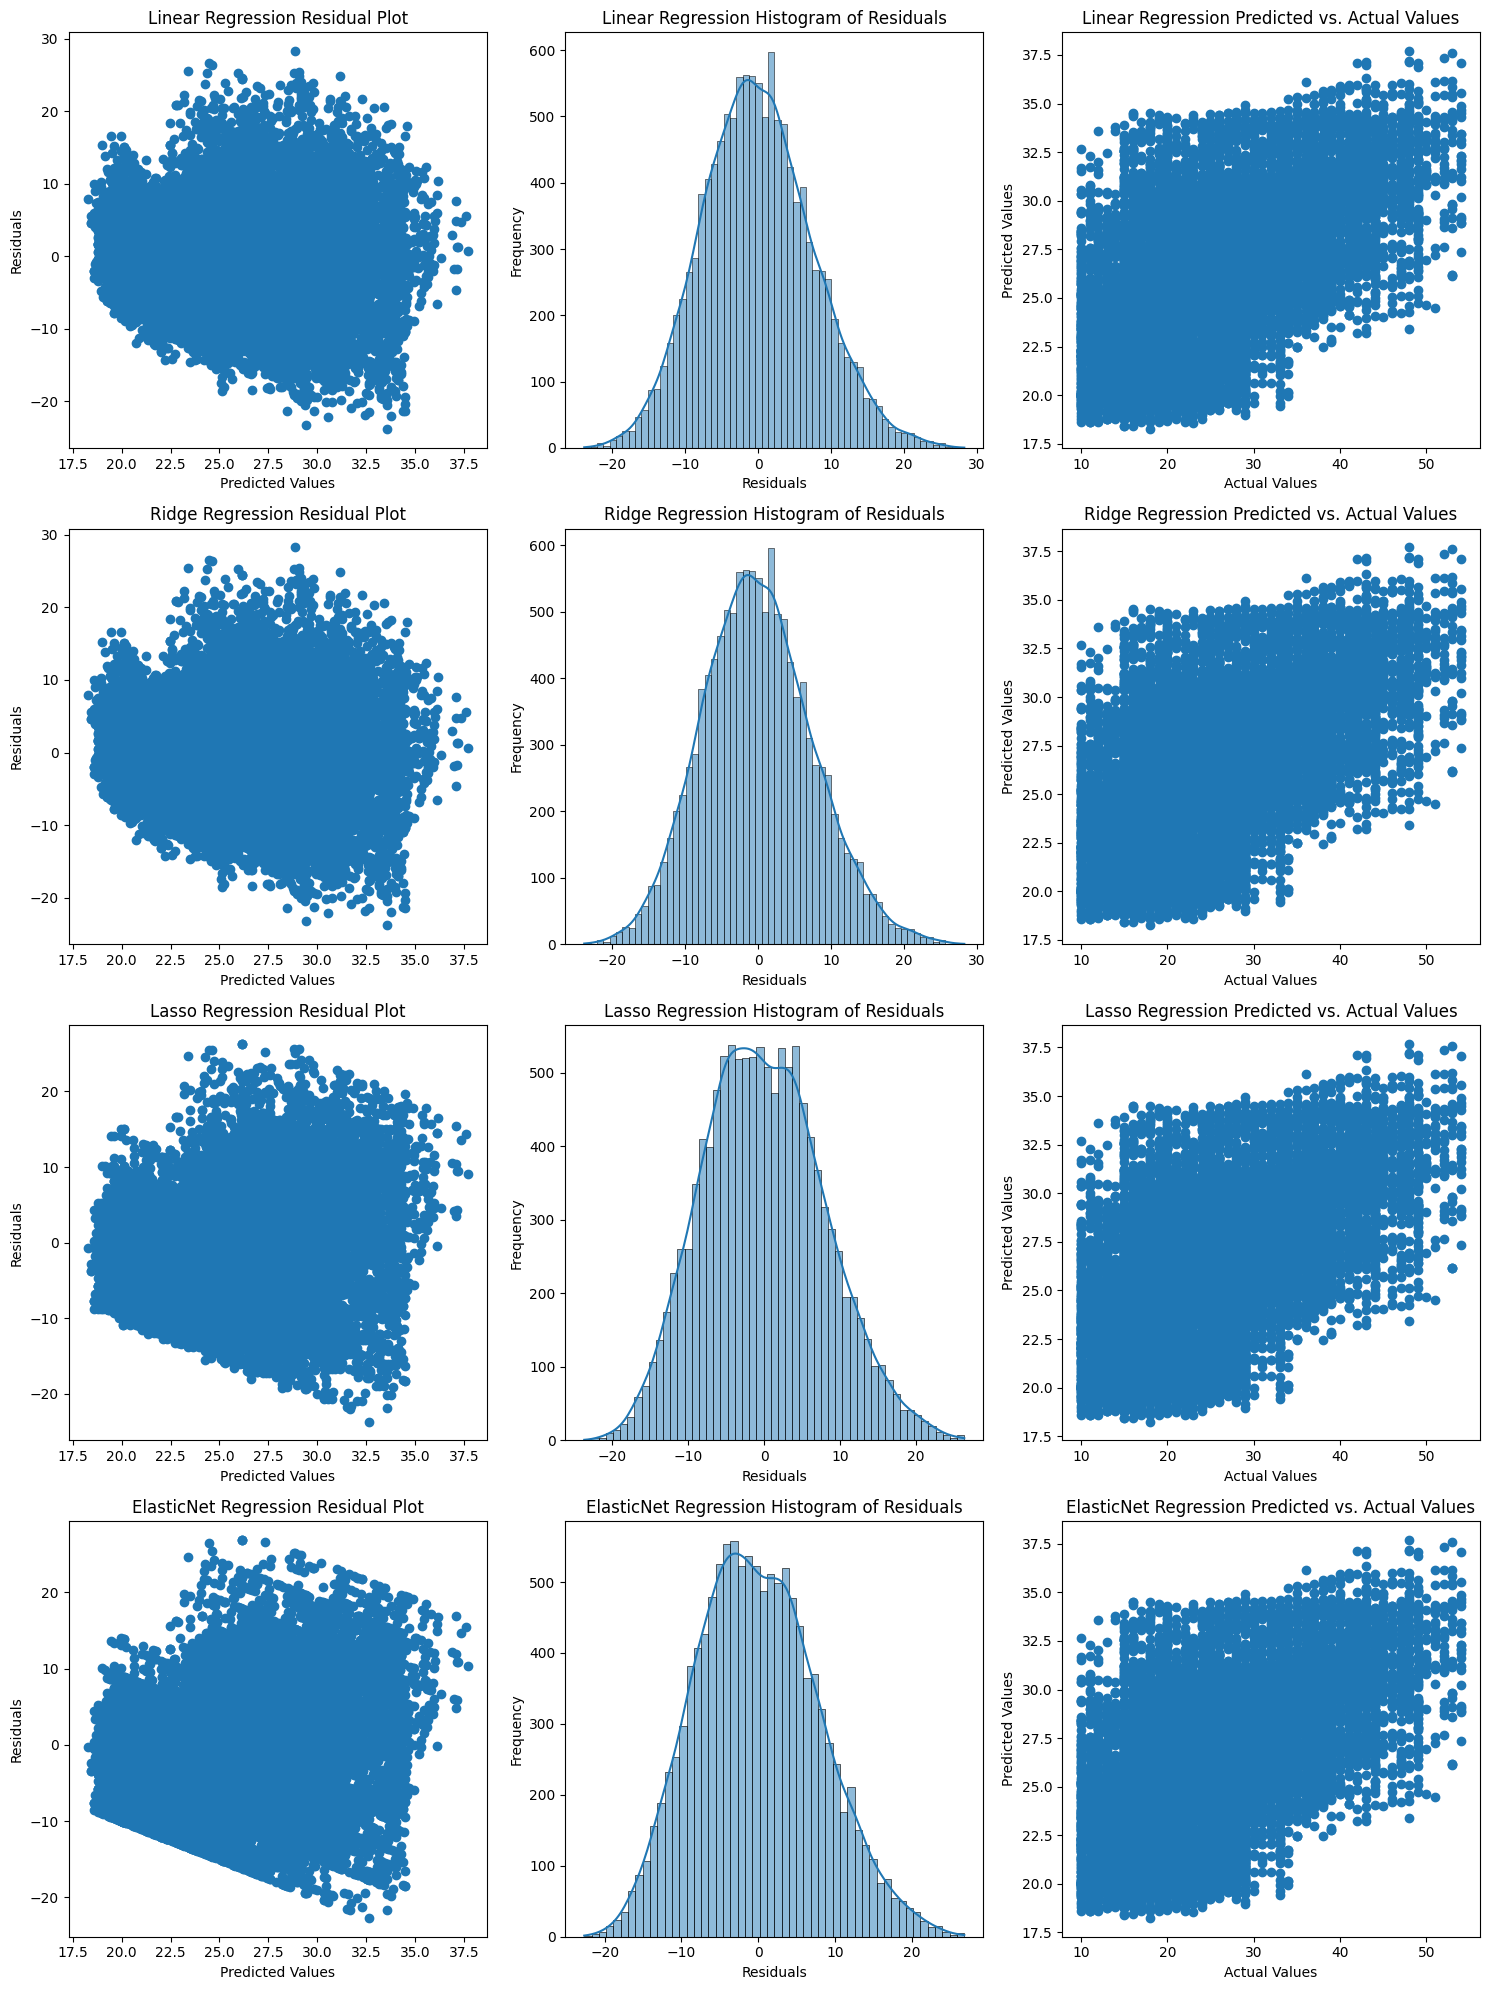

In [73]:
fig, axs = plt.subplots(len(model_y_pred), 3, figsize=(15, 5*len(model_y_pred)))

for i, (name, model) in enumerate(model_y_pred.items()):
    residuals = y_test - model_y_pred[name]

    # Residual plot
    axs[i, 0].scatter(y_pred, residuals)
    axs[i, 0].set_xlabel('Predicted Values')
    axs[i, 0].set_ylabel('Residuals')
    axs[i, 0].set_title(f'{name} Residual Plot')

    # Histogram of residuals
    sns.histplot(residuals, kde=True, ax=axs[i, 1])
    axs[i, 1].set_xlabel('Residuals')
    axs[i, 1].set_ylabel('Frequency')
    axs[i, 1].set_title(f'{name} Histogram of Residuals')

    # Scatter plot of predicted vs. actual values
    axs[i, 2].scatter(y_test, y_pred)
    axs[i, 2].set_xlabel('Actual Values')
    axs[i, 2].set_ylabel('Predicted Values')
    axs[i, 2].set_title(f'{name} Predicted vs. Actual Values')

plt.tight_layout()
plt.show()

In [80]:
score_df = pd.DataFrame(model_metrics)
print(score_df)

                   model  r2_score  mean_absolute_error  mean_squared_error
0      Linear Regression  0.354316             6.010167           56.798322
1       Ridge Regression  0.354316             6.010180           56.798290
2       Lasso Regression  0.281986             6.438961           63.160895
3  ElasticNet Regression  0.271629             6.493798           64.071942


In [81]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/73/da/d5d77a9a7a135c948dbf8d3b873655b105a152d69e590150c83d23c3d070/mlxtend-0.23.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.4 MB 544.7 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.4 MB 1.3 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.4 MB 1.6 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.4 MB 1.7 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.4 MB 2.0 MB/s eta 0:00:01
   ------------------ --------------------- 0.7/1.4 MB 2.1 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.4 MB 2.3 MB/s eta 0


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [82]:
# Feature Selection

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [ ]:
# Feature Selection

for name, estimator in model_estimators:

    feature_selector= EFS(
        estimator=estimator, 
        min_features = 8,
        max_features = 16, 
        scoring=recall_f_scorer,
        fixed_features=fixed_features_numbers_tuple,
        cv=cv_StratifiedKFold
    )

    # find the best features
    feature_selector.fit_transform(X_best_estimators, y_best_estimators)

    # Store the best Features per model
    best_estimators_features[name] = feature_selector.best_feature_names_.tolist()
